In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

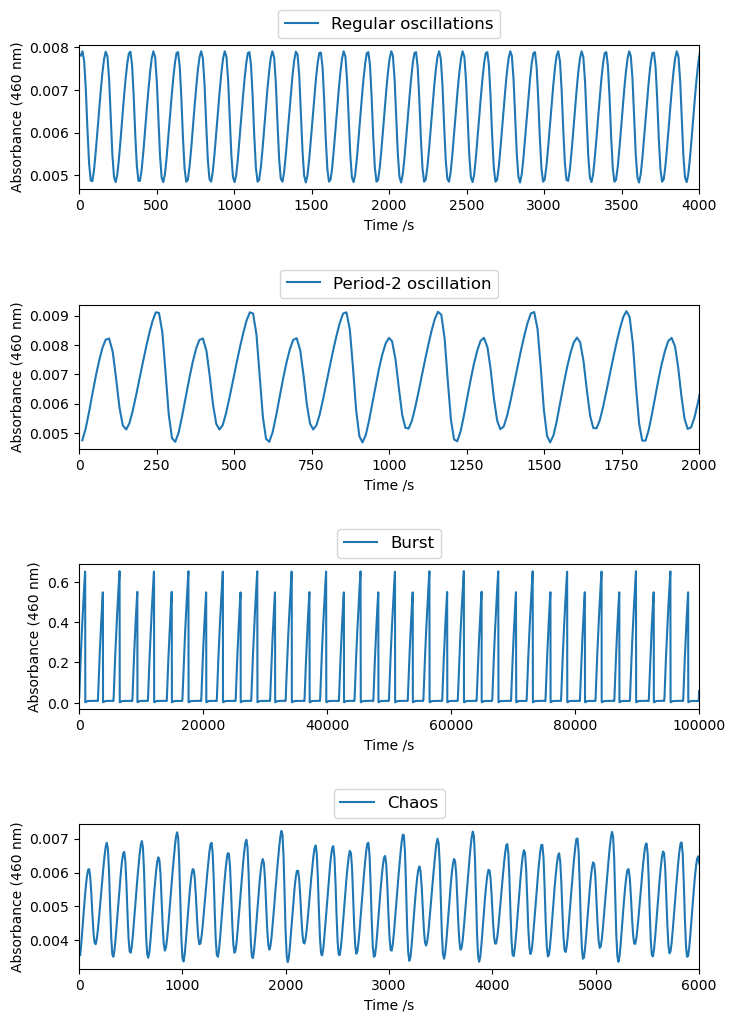

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the file names and corresponding plot labels
data_files = [
    {'file_name': 'Regular oscillations.txt', 'label': 'Regular oscillations', 'xlim': [0, 4000]},
    {'file_name': 'Period-2 oscillation.txt', 'label': 'Period-2 oscillation', 'xlim': [0, 2000]},
    {'file_name': 'Burst.txt', 'label': 'Burst', 'xlim': [0, 100000]},
    {'file_name': 'Chaos.txt', 'label': 'Chaos', 'xlim': [0, 6000]}
]

# Load and plot the data
fig, axes = plt.subplots(nrows=len(data_files), ncols=1, figsize=(8,12))
for i, file_data in enumerate(data_files):
    data = np.loadtxt(file_data['file_name'], skiprows=1)
    x = data[:,0]
    y = data[:,1]
    axes[i].plot(x, y, label=file_data['label'])
    axes[i].set_xlim(file_data['xlim'])
    axes[i].set_xlabel('Time /s')
    axes[i].set_ylabel('Absorbance (460 nm)')
    axes[i].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=1, fontsize='large')

plt.subplots_adjust(hspace=0.8)
plt.show()


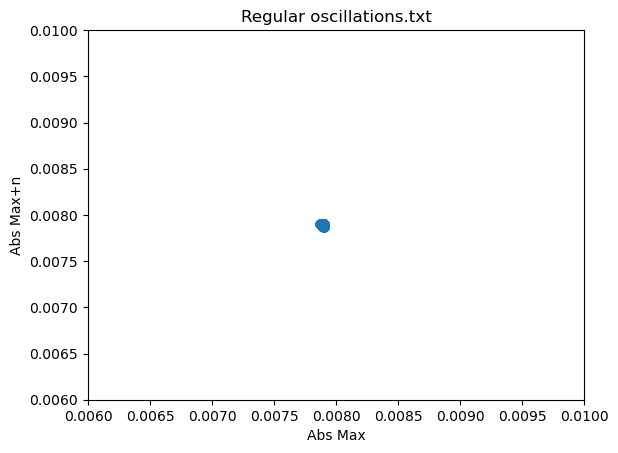

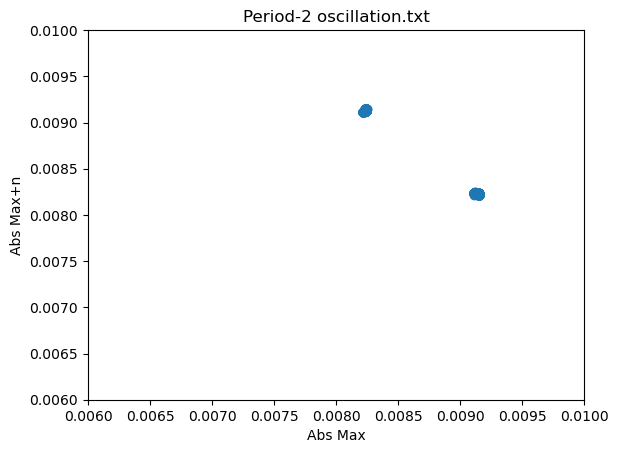

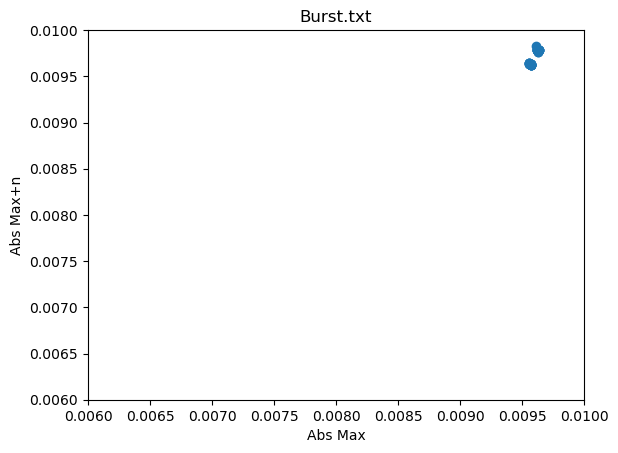

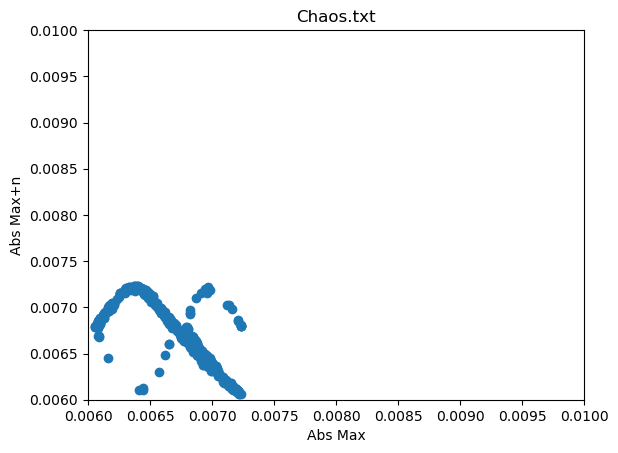

<Figure size 640x480 with 0 Axes>

In [9]:
# Import data
data_files = ['Regular oscillations.txt', 'Period-2 oscillation.txt', 'Burst.txt', 'Chaos.txt']

# Define the column names for the data frames
col_names = ["Time /s","Abs Max"]

# Create an empty list to hold the data frames
dfs = []

# Loop through the data files, find the max points and build a data frame for each file
for file in data_files:
    data = np.loadtxt(file, skiprows=1)
    x = data[:,0] 
    y = data[:,1] 
    
    max_points = []
    prev_point = y[0]
    for i in range(1,len(y)-1):
        if y[i] > prev_point and y[i] > y[i+1]:
            max_points.append((x[i],y[i]))
        prev_point = y[i]
    
    df = pd.DataFrame(max_points, columns=col_names)
    dfs.append(df)
    
#Plot Lorenz Map
    df["Abs Max+n"] = df["Abs Max"].shift(-1)               #create a new column
    df = df[:-1]                                            #remove the last row

    plt.scatter(df["Abs Max"], df["Abs Max+n"])             #Create the scatter plot
    plt.xlabel("Abs Max")
    plt.ylabel("Abs Max+n")
    plt.xlim(0.006,0.010)
    plt.ylim(0.006,0.010)
    plt.title(file)
    plt.show()
        
    